In [1]:
# This reads in a contrast curve and converts the contrast to masses

# Created 2020 Feb. 13 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from scipy import interpolate

%matplotlib qt

In [ ]:
# Obtain input data

# pipeline will output a fake companion amplitude which is normalized, linearly, to the host star (amplitude of 1)

# make/read in a contrast curve

contrast_df = pd.read_csv("data/fake_contrast_curve.csv")

# set the absolute magnitude of the host star (NOTE THAT IT IS A VARIABLE SOURCE!)


In [4]:
# convert linear empirical contrast to mags
contrast_df["del_mag_LMIR"] = -2.5*np.log10(contrast_df["contrast_lim"])

# convert asec to AU
dist_altair = 5.130 # pc
contrast_df["AU"] = np.multiply(dist_altair,contrast_df["asec"])

In [5]:
# read in models

# these are from
# AMES-Cond: https://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega

# Br-alpha filter is model_data["NB4.05"], in Vega magnitudes

model_data = pd.read_csv("data/1gr_data.txt", delim_whitespace=True)

In [6]:
# read in NACO transmission curve for comparison

naco_trans = pd.read_csv("data/Paranal_NACO.NB405.dat.txt", names = ["angstrom", "transm"], delim_whitespace=True)
lmir_bralpha_trans = pd.read_csv("data/br-alpha_NDC.txt", delim_whitespace=True)
lmir_bralpha_trans["Wavelength_angstr"] = np.multiply(10000.,lmir_bralpha_trans["Wavelength"])

In [7]:
lmir_bralpha_trans.keys()

Index(['Wavelength', 'Trans_77', 'Trans_300', 'Wavelength_angstr'], dtype='object')

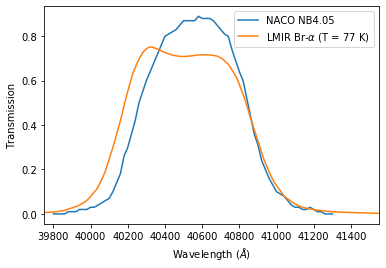

In [8]:
# plot filter curves

plt.clf()
plt.plot(naco_trans["angstrom"], naco_trans["transm"], label = "NACO NB4.05")
plt.plot(lmir_bralpha_trans["Wavelength_angstr"], lmir_bralpha_trans["Trans_77"], 
         label = "LMIR Br-"+r"$\alpha$ (T = 77 K)")
plt.xlim([39750,41550])
plt.xlabel("Wavelength ("+r"$\AA$"+")")
plt.ylabel("Transmission")
plt.legend()
plt.show()

In [9]:
model_data

,M/Ms,Teff(K),L/Ls,lg(g),R(Gcm,D,Li,J,H,Ks,...,IB2.33,IB2.36,IB2.39,IB2.42,IB2.45,IB2.48,1p6,1p57,1p625_q3,1p625_q4
0,0.0005,111.0,-8.85,3.12,7.13,1.0000,1.0000,37.946,32.828,53.077,...,63.818,66.254,62.135,55.153,50.325,48.276,33.670,32.806,35.892,35.843
1,0.0010,160.0,-8.19,3.39,7.39,1.0000,1.0000,31.299,29.035,44.538,...,53.181,56.081,54.242,48.166,44.377,42.060,29.294,28.575,31.418,31.369
2,0.0020,226.0,-7.56,3.66,7.60,1.0000,1.0000,25.315,25.017,35.698,...,41.787,45.287,45.404,40.829,37.787,35.768,24.669,24.092,26.755,26.705
3,0.0030,270.0,-7.24,3.83,7.69,1.0000,1.0000,23.488,23.519,32.195,...,37.575,40.875,40.913,38.135,34.704,32.816,22.796,22.420,24.792,24.741
4,0.0040,304.0,-7.03,3.95,7.72,1.0000,1.0000,21.978,22.402,29.484,...,34.331,37.469,37.495,35.911,32.331,30.518,21.423,21.163,23.347,23.297
5,0.0050,342.0,-6.83,4.05,7.68,1.0000,1.0000,21.293,21.556,27.638,...,32.013,34.753,34.792,33.668,30.376,28.870,20.498,20.285,22.378,22.328
6,0.0060,377.0,-6.66,4.13,7.65,1.0000,1.0000,20.626,20.733,25.869,...,29.827,32.247,32.286,31.652,28.568,27.313,19.593,19.423,21.427,21.379
7,0.0070,403.0,-6.56,4.21,7.59,1.0000,1.0000,20.142,20.158,24.601,...,28.292,30.532,30.559,30.288,27.312,26.186,18.972,18.824,20.777,20.730
8,0.0080,438.0,-6.42,4.27,7.53,1.0000,1.0000,19.725,19.679,23.392,...,26.896,28.963,29.005,28.880,26.172,25.113,18.446,18.334,20.211,20.166
9,0.0090,464.0,-6.33,4.33,7.47,1.0000,1.0000,19.428,19.329,22.514,...,25.870,27.787,27.840,27.834,25.333,24.329,18.062,17.973,19.800,19.756


# First pass: convert mag difference to mass

# (want function that takes a mag and returns a mass)

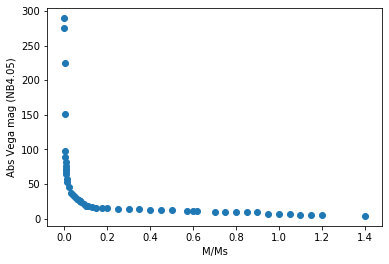

In [10]:
# plot first

plt.scatter(model_data["M/Ms"],model_data["NB4.05"])
plt.xlabel("M/Ms")
plt.ylabel("Abs Vega mag (NB4.05)")
#plt.title("AMES-Cond models\nhttps://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega")
#plt.xlim([0.075,0.16])
#plt.ylim([16,21])
#plt.gca().invert_yaxis()
plt.show()

In [11]:
# interpolate models

f = interpolate.interp1d(model_data["NB4.05"],model_data["M/Ms"])

xnew = contrast_df["del_mag_LMIR"]

# return masses corresponding to contrast curve
ynew = f(xnew) 

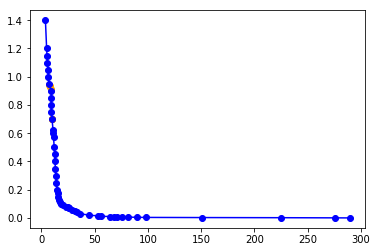

In [9]:
plt.clf()
plt.plot(model_data["NB4.05"], model_data["M/Ms"], color="blue", label="model", marker="o")
plt.scatter(contrast_df["del_mag_LMIR"], ynew, color="orange", label="contrast curve interpolation")
plt.show()

In [25]:
contrast_df["del_mag_LMIR"]

0    5.000000
1    5.242275
2    5.994850
3    6.139830
4    7.614394
5    9.247425
6    9.361819
7    9.489700
8    9.634680
Name: mag, dtype: float64

In [24]:
ynew

array([1.19909326, 1.16771049, 1.07001875, 1.05189626, 0.93833701,
       0.90360644, 0.90117357, 0.74422098, 0.73269635])

In [20]:
masses_test = np.copy(ynew)

In [21]:
# interpolate models

f = interpolate.interp1d(model_data["M/Ms"],model_data["NB4.05"])

xnew = masses_test

# return masses corresponding to contrast curve
ynew = f(xnew) 

In [40]:
plt.clf()
plt.plot(model_data["M/Ms"],model_data["NB4.05"])
plt.xlabel("M/Ms")
plt.ylabel("Abs Vega mag (NB4.05)")
plt.title("AMES-Cond models\nhttps://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega")
plt.xlim([0.075,0.16])
plt.ylim([16,21])
plt.gca().invert_yaxis()
plt.show()

In [78]:
# plot:

# left y-axis: mag difference
# bottom x-axis: asec
# right y-axis: M/Ms
# top x-axis: AU

# -- I couldn't figure out how to do this with a reversed magnitude axis; below is my attempt  --E.S., 2020 Feb 20

# define conversion functions and their inverses for the axis mappings


def asec_to_AU(input_asec):

    # convert asec to AU
    dist_altair = 5.130 # pc
    output_AU = np.multiply(dist_altair,input_asec)
    
    return output_AU


def AU_to_asec(input_AU):

    # convert AU to asec
    dist_altair = 5.130 # pc
    output_asec = np.divide(input_AU,dist_altair)
    
    return output_asec


def contrast_to_mass(input_mag):

    # interpolate models
    '''
    fc2m = interpolate.interp1d(model_data["NB4.05"].values,model_data["M/Ms"].values)
    xnew = input_mag
    # return masses corresponding to contrast curve
    print("--------------")
    print("contrast to mass")
    print(input_mag)
    print(xnew)
    ynew = fc2m(xnew) 
    
    print(ynew)
    
    #return ynew
    '''
    
    # begin test
    return np.interp(input_mag,model_data["NB4.05"].values,model_data["M/Ms"].values)

    


def mass_to_contrast(input_mass):

    # interpolate models
    '''
    fm2c = interpolate.interp1d(model_data["M/Ms"].values,model_data["NB4.05"].values)
    xnew = input_mass
    # return contrasts corresponding to mass
    print("--------------")
    print("mass to contrast")
    print(input_mass)
    print(xnew)
    ynew = fm2c(xnew) 
    
    print(ynew)

    #return ynew
    '''
    
    # begin test
    return np.interp(input_mass,model_data["M/Ms"].values,model_data["NB4.05"].values)


fig, ax = plt.subplots(constrained_layout=True)
x = contrast_df["asec"].values
y = contrast_df["del_mag_LMIR"].values
ax.plot(contrast_df["asec"], contrast_df["del_mag_LMIR"])
ax.set_ylabel('Contrast (mag)')
ax.set_xlabel('Distance (asec)')
#ax.set_title('Mass Limits')

secax_x = ax.secondary_xaxis('top', functions=(asec_to_AU, AU_to_asec))
secax_x.set_xlabel('Distance (AU)')

secax_y = ax.secondary_yaxis('right', functions=(contrast_to_mass, mass_to_contrast))
secax_y.set_ylabel("Mass (M/M$_{\odot}$)")

#plt.gca().invert_yaxis()
#secax_y.invert_yaxis()

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
secax_y.set_ylim(secax_y.get_ylim()[::-1])

print(secax_y.yaxis_inverted())

#fig = ax.get_figure()
#fig.ax.invert_yaxis()

plt.show()

True


/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel/eventloops.py:106: UserWarning: Attempting to set identical bottom == top == 1.4 results in singular transformations; automatically expanding.
  app.exec_()


In [ ]:
# next pass: get the zero point right